In [45]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn

In [46]:
train_nsl_kdd_dataset_path = "NSL_KDD_Dataset/KDDTrain+.txt"
col_names = np.array(["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","labels"])

categoricalColumns = col_names[[1,2,3]]
binaryColumns = col_names[[6, 11, 13, 14, 20, 21]]
numericColumns = col_names[list(set(range(41)) - set([1,2,3]) - set([6, 11, 13, 14, 20, 21]))]

train = pd.read_csv(train_nsl_kdd_dataset_path, header=None)
train.drop([42], 1, inplace=True)
train.columns = col_names
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [47]:
train.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [48]:
# Dictionary that contains mapping of various attacks to the four main categories
attack_dict = {
    'normal': 'normal',
   
    'back': 'DoS',
    'land': 'DoS',
    'neptune': 'DoS',
    'pod': 'DoS',
    'smurf': 'DoS',
    'teardrop': 'DoS',
    'mailbomb': 'DoS',
    'apache2': 'DoS',
    'processtable': 'DoS',
    'udpstorm': 'DoS',
    
    'ipsweep': 'Probe',
    'nmap': 'Probe',
    'portsweep': 'Probe',
    'satan': 'Probe',
    'mscan': 'Probe',
    'saint': 'Probe',

    'ftp_write': 'R2L',
    'guess_passwd': 'R2L',
    'imap': 'R2L',
    'multihop': 'R2L',
    'phf': 'R2L',
    'spy': 'R2L',
    'warezclient': 'R2L',
    'warezmaster': 'R2L',
    'sendmail': 'R2L',
    'named': 'R2L',
    'snmpgetattack': 'R2L',
    'snmpguess': 'R2L',
    'xlock': 'R2L',
    'xsnoop': 'R2L',
    'worm': 'R2L',
    
    'buffer_overflow': 'U2R',
    'loadmodule': 'U2R',
    'perl': 'U2R',
    'rootkit': 'U2R',
    'httptunnel': 'U2R',
    'ps': 'U2R',    
    'sqlattack': 'U2R',
    'xterm': 'U2R'
}

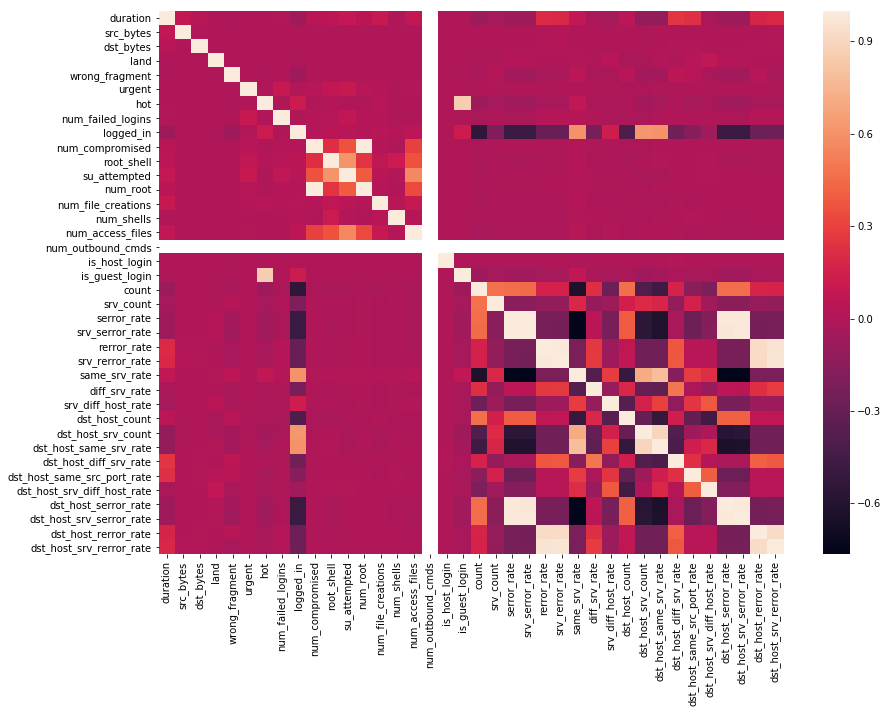

In [49]:
plt.figure(figsize=(14, 10))
seaborn.heatmap(train.corr())

## Things to do
1. One hot encode the vector
2. Read up the papers which have analyzed this dataset and perform the feature engineering performed
3. Train Multiple classifier
4. Setup a spark cluster for this work, even a single node one works

## Data Analysis


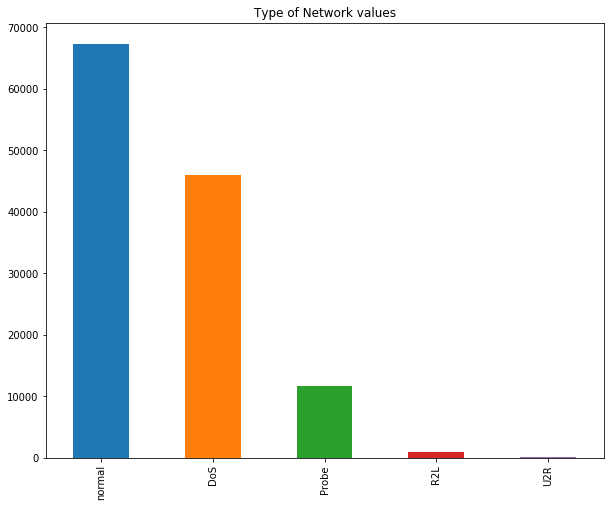

In [50]:
plt.figure(figsize=(10, 8))
train['labels'].map(lambda x: attack_dict[x]).value_counts().plot.bar(title='Type of Network values')

In [51]:
trainDescribe = train[numericColumns].describe()
trainDescribe.T

,count,mean,std,min,25%,50%,75%,max
duration,125973.0,287.144650,2.604515e+03,0.0,0.00,0.00,0.00,4.290800e+04
src_bytes,125973.0,45566.743000,5.870331e+06,0.0,0.00,44.00,276.00,1.379964e+09
dst_bytes,125973.0,19779.114421,4.021269e+06,0.0,0.00,0.00,516.00,1.309937e+09
wrong_fragment,125973.0,0.022687,2.535300e-01,0.0,0.00,0.00,0.00,3.000000e+00
urgent,125973.0,0.000111,1.436603e-02,0.0,0.00,0.00,0.00,3.000000e+00
hot,125973.0,0.204409,2.149968e+00,0.0,0.00,0.00,0.00,7.700000e+01
num_failed_logins,125973.0,0.001222,4.523914e-02,0.0,0.00,0.00,0.00,5.000000e+00
num_compromised,125973.0,0.279250,2.394204e+01,0.0,0.00,0.00,0.00,7.479000e+03
num_root,125973.0,0.302192,2.439962e+01,0.0,0.00,0.00,0.00,7.468000e+03
num_file_creations,125973.0,0.012669,4.839351e-01,0.0,0.00,0.00,0.00,4.300000e+01


Columns of interest:
For each of these columns we should check how much of the data is 0
1. wrong_fragment
2. urgent
3. num_failed_logins
4. num_shells
5. num_access_files
6. num_outbound_cmds
7. rerror_rate
8. srv_rerror_rate
9. srv_diff_host_rate
10. dst_host_serror_rate
11. dst_host_same_src_port_rate
12. dst_host_rerror_rate
13. dst_host_srv_rerror_rate

In [52]:
cols_to_check = ['wrong_fragment', 'urgent', 'num_failed_logins', 'num_shells', 'num_access_files', 'num_outbound_cmds',
                 'rerror_rate', 'srv_rerror_rate', 'srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_same_src_port_rate',
                'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']
train[cols_to_check].quantile([0.8, 0.95])

,wrong_fragment,urgent,num_failed_logins,num_shells,num_access_files,num_outbound_cmds,rerror_rate,srv_rerror_rate,srv_diff_host_rate,dst_host_serror_rate,dst_host_same_src_port_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0.80,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.02,1.0,0.15,0.0,0.0
0.95,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.00,1.0,1.00,1.0,1.0


Empty DataFrame
Columns: [count, mean, std, min, 25%, 50%, 75%, max]
Index: []
There are 16 Columns with 75% of data 0: 
 Index(['duration', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins',
       'num_compromised', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'rerror_rate',
       'srv_rerror_rate', 'srv_diff_host_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate'],
      dtype='object')


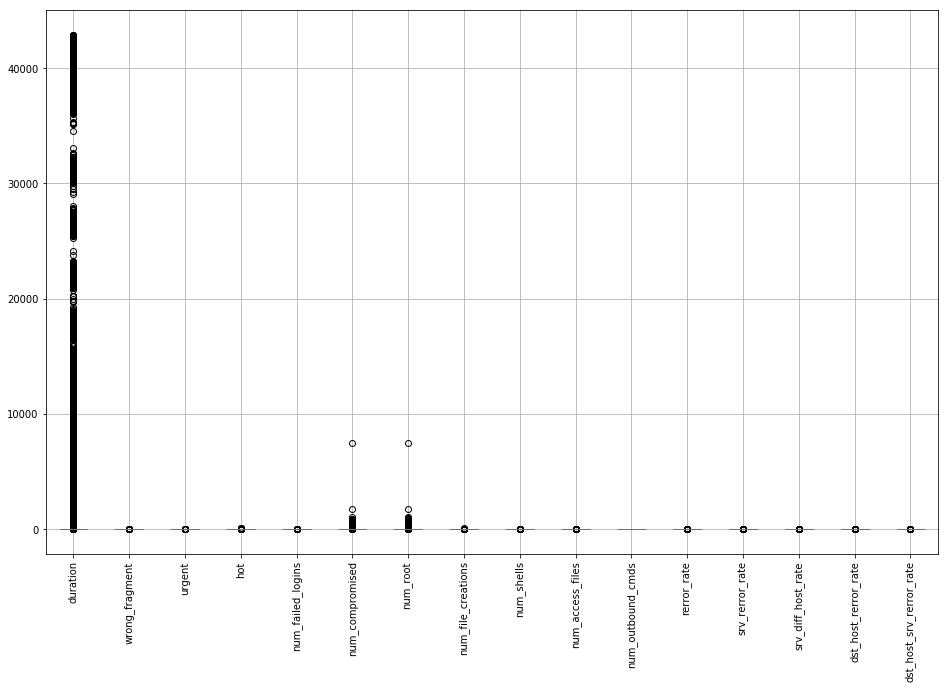

In [53]:
#So there are no negative value so the data looks clean enough to work with
print(trainDescribe.T[(trainDescribe.T['min'] < 0)])
colsWith75Zero = trainDescribe.T[(trainDescribe.T['75%'] == 0)].T.columns
print('There are', len(colsWith75Zero), 'Columns with 75% of data 0: \n', colsWith75Zero)
plt.figure(figsize=(16, 10))
train.boxplot(list(colsWith75Zero), rot=90)

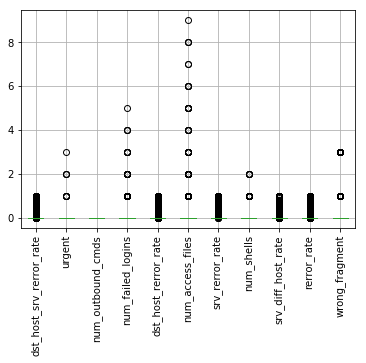

In [54]:
train.boxplot(list(set(colsWith75Zero) - set(['duration', u'num_compromised', 'num_root', 'hot', u'num_file_creations'])), rot=90)

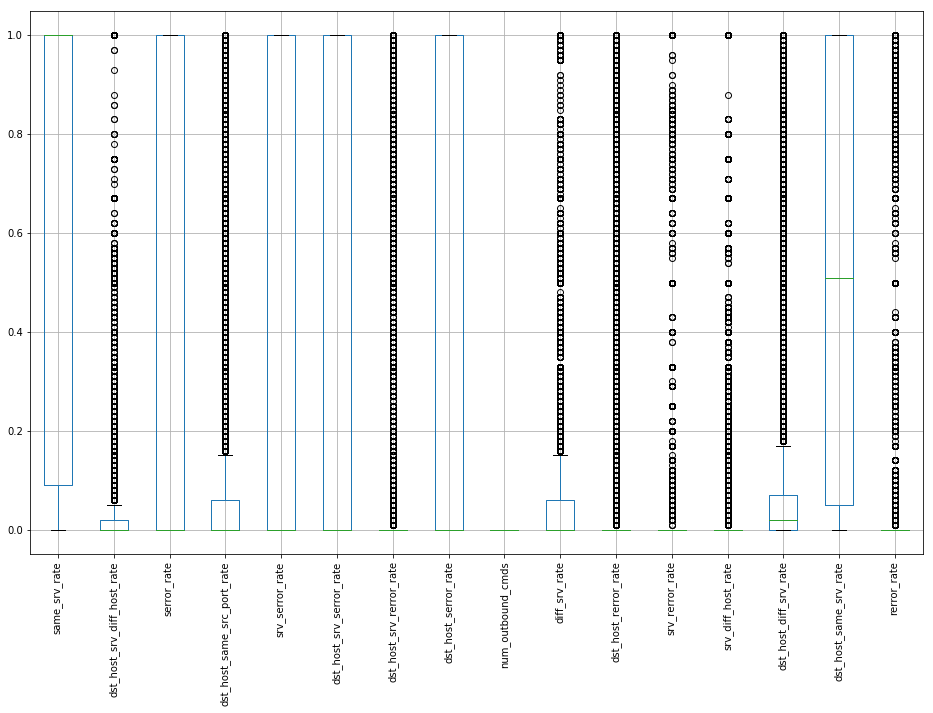

In [55]:
#Most of the things seems to be mostly near zero
plt.figure(figsize=(16, 10))
colsWithMaxLessThan1 = list(set(trainDescribe.columns) -  set(trainDescribe.T[trainDescribe.T['max'] > 1].T.columns))
train.boxplot(colsWithMaxLessThan1, rot=90)

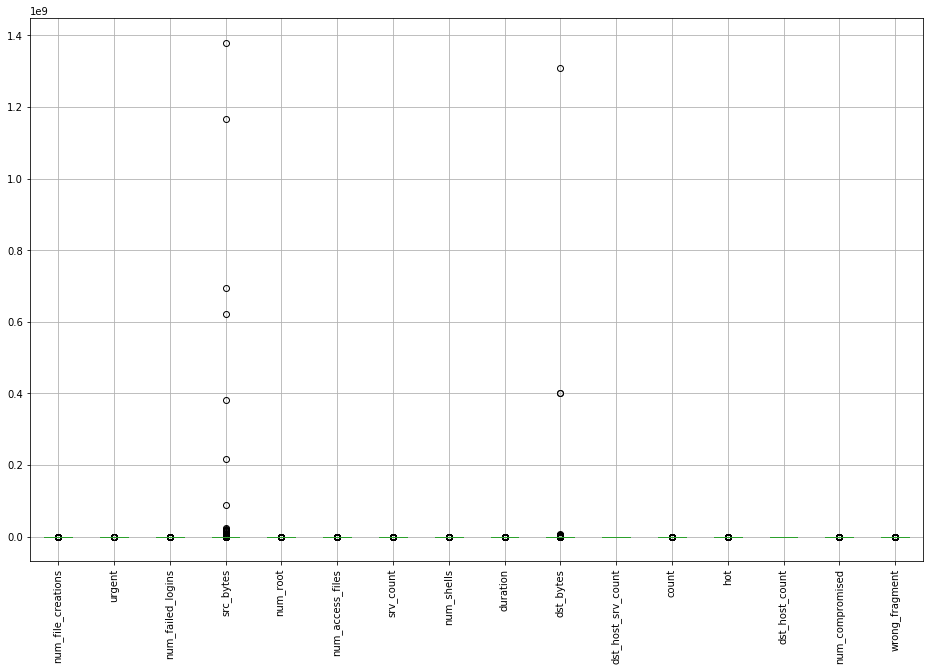

In [56]:
#Plot of columns with max > 1
plt.figure(figsize=(16, 10))
colsWithMaxMoreThan1 = list(set(trainDescribe.T[trainDescribe.T['max'] > 1].T.columns))
train.boxplot(colsWithMaxMoreThan1, rot=90)

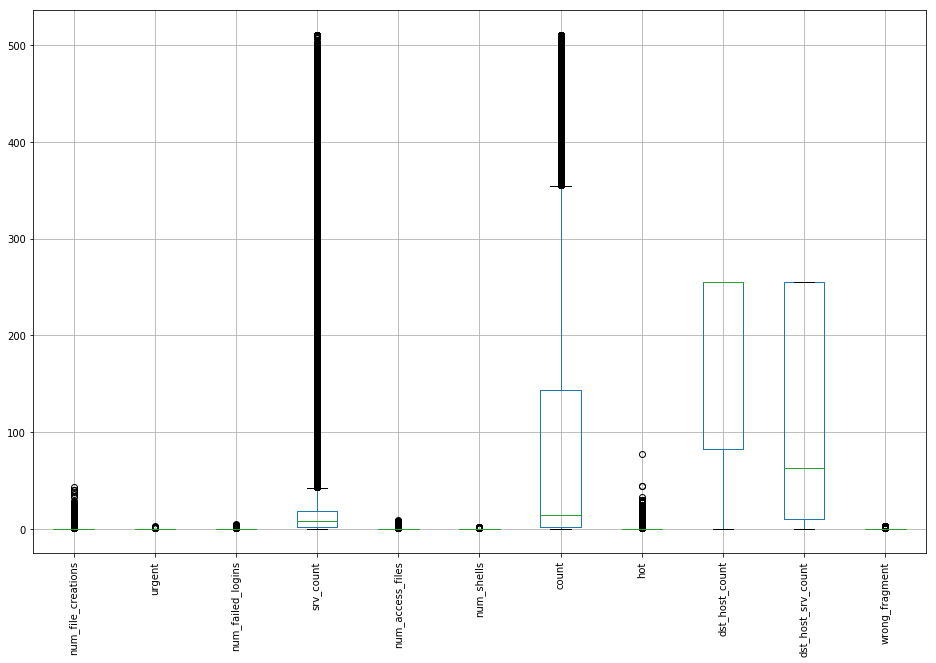

In [57]:
#Plot of columns with max > 1 but with certain features removed to better understand the remaining ones
plt.figure(figsize=(16, 10))
train.boxplot(list(set(trainDescribe.T[trainDescribe.T['max'] > 1].T.columns) - set(['src_bytes', 'dst_bytes','duration', u'num_compromised', 'num_root'])), rot=90)

Given the above plots, the following observations can be made
1. The columns 'duration', 'num_compromised', 'num_root' have 75% of the data zero but they also do have a lot of high value data points as well. A box plot shows that most of the non-zero data lies in the outlier region

2. The feature values range over a huge domain, in such cases normalization should help simpler linear models such as 
Logistic Regression to 

3. For the following 6 features: wrong_fragment, urgent, num_failed_logins, num_shells, num_access_files, num_outbound_cmds 95% of the data is 0. So we can safely remove them from our experimentation

In [58]:
set(colsWithMaxLessThan1).intersection(set(colsWith75Zero))

{'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate',
 'num_outbound_cmds',
 'rerror_rate',
 'srv_diff_host_rate',
 'srv_rerror_rate'}

In [59]:
#Many of the int/float values seems to be near 0 as for many min, 25%, 50% and 75%
#Looking at the only 3 string labels in the dataset
train['labelsMapped'] = train['labels'].map(lambda x: attack_dict[x])
train.groupby(['protocol_type', 'labelsMapped']).count()['duration'].reset_index().sort_values(by=['protocol_type', 'duration'], ascending=False).rename(columns={'duration': 'count'})

,protocol_type,labelsMapped,count
11,udp,normal,12434
9,udp,Probe,1664
8,udp,DoS,892
10,udp,U2R,3
7,tcp,normal,53600
3,tcp,DoS,42188
4,tcp,Probe,5857
5,tcp,R2L,995
6,tcp,U2R,49
1,icmp,Probe,4135


In [60]:
#It seems all network connections using icmp is mostly an attack
train.groupby(['service', 'labelsMapped']).count()['duration'].reset_index().sort_values(by=['service', 'duration'], ascending=False).rename(columns={'duration': 'count'})

,service,labelsMapped,count
156,whois,DoS,670
157,whois,Probe,23
154,vmnet,DoS,606
155,vmnet,Probe,11
152,uucp_path,DoS,676
153,uucp_path,Probe,13
150,uucp,DoS,769
151,uucp,Probe,11
149,urp_i,normal,599
148,urp_i,Probe,3


In [61]:
#print train.service.unique().shape
#print train.flag
train.shape

(125973, 43)

In [62]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
enc = LabelEncoder()
#
def encodeCategorical(ser):
    return enc.fit_transform(ser)

train['service'] = encodeCategorical(train['service'])
train['flag'] = encodeCategorical(train['flag'])
train_processed = pd.get_dummies(train, columns=['protocol_type'])
train_processed.head() 

,duration,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels,labelsMapped,protocol_type_icmp,protocol_type_tcp,protocol_type_udp
0,0,20,9,491,0,0,0,0,0,0,...,0.00,0.00,0.00,0.05,0.00,normal,normal,0,1,0
1,0,44,9,146,0,0,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,normal,normal,0,0,1
2,0,49,5,0,0,0,0,0,0,0,...,0.00,1.00,1.00,0.00,0.00,neptune,DoS,0,1,0
3,0,24,9,232,8153,0,0,0,0,0,...,0.04,0.03,0.01,0.00,0.01,normal,normal,0,1,0
4,0,24,9,199,420,0,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,normal,normal,0,1,0


In [63]:
# print(train_processed.columns.values)
print(categoricalColumns)
print(train_processed["service"])
print(binaryColumns)
#print(numericColumns)
from collections import OrderedDict
ar = {}
denom = {}
# count = {}
#for column in numericColumns:
#    ar[column] = train_processed.groupby('labelsMapped')[[column]].mean()/train_processed[column].mean()


for col in numericColumns:
    denom[col] = train_processed[col].mean();
    #print("column :", col, " and avg :  ", denom[col])
#print(denom)  
for col in numericColumns:
    
    ar[col] = train_processed.fillna(value=0.0).groupby('labelsMapped')[[col]].mean().max().values[0]/denom[col]
    #print("column :", col, " and val : ", num[col])
    #ar[col] = num[col]/denom[col]
  
print("###############")
print(train_processed["logged_in"].value_counts())
for col in binaryColumns:
#     print("column name:", col)
    val = (train_processed[col].fillna(value=1000).sum()/[train_processed[col].count()-train_processed[col].fillna(value=1000).sum()])
    ar[col] = val[0]
#     count[col] = (train_processed[col].count())
    #[train_processed[col].count()-train_processed[col].sum()]
#ar = dict((k,float(num[k])/denom[k]) for k in denom)
# print(ar)
# print(OrderedDict(sorted(ar.items(), key=lambda v: -v[1])))
# print(count["is_host_login"])
OrderedDict(sorted(ar.items(), key=lambda v: -v[1]))

['protocol_type' 'service' 'flag']
0         20
1         44
2         49
3         24
4         24
5         49
6         49
7         49
8         51
9         49
10        49
11        49
12        24
13        20
14        36
15        38
16        24
17        14
18        24
19        24
20        35
21        49
22        24
23        44
24        35
25        60
26        49
27        24
28        24
29        24
          ..
125943    20
125944    54
125945    24
125946    18
125947    14
125948    49
125949    24
125950    49
125951    24
125952    54
125953     4
125954    24
125955    24
125956    14
125957    54
125958    49
125959    24
125960    24
125961    24
125962    12
125963    24
125964    49
125965    54
125966    49
125967    24
125968    49
125969    49
125970    54
125971    30
125972    20
Name: service, Length: 125973, dtype: int64
['land' 'logged_in' 'root_shell' 'su_attempted' 'is_host_login'
 'is_guest_login']


/Users/buddhapuneeth/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide


###############
0    76121
1    49852
Name: logged_in, dtype: int64


OrderedDict([('num_shells', 326.11353550295854),
             ('urgent', 173.03983516483518),
             ('num_file_creations', 62.233624927703879),
             ('num_failed_logins', 46.038556418455919),
             ('hot', 40.774516817095183),
             ('dst_bytes', 9.1548543553434012),
             ('src_bytes', 8.4640642049489454),
             ('duration', 7.2258291572125568),
             ('dst_host_srv_diff_host_rate', 5.7568806827546997),
             ('dst_host_diff_srv_rate', 4.8373418489732671),
             ('num_access_files', 4.6948792486583191),
             ('dst_host_same_src_port_rate', 4.3930803788834885),
             ('num_compromised', 4.3385392749839271),
             ('diff_srv_rate', 4.0690854850685172),
             ('dst_host_srv_rerror_rate', 3.667920527965804),
             ('srv_rerror_rate', 3.6677418023254122),
             ('rerror_rate', 3.6455860878284372),
             ('dst_host_rerror_rate', 3.2795669242442695),
             ('srv_diff_host_

In [64]:
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score

# x_train, x_val, y_train, y_val = train_test_split(train_processed.drop(['labelsMapped', 'labels'], 1), 
#                                                   train_processed['labelsMapped'], test_size=0.2, 
#                                                   random_state=42)
# print(x_train.shape)
# print(x_val.shape)
# print(y_train.shape)
# print(y_val.shape)
# mdl = RandomForestClassifier(n_estimators = 100, max_depth = 15, class_weight="balanced")
# mdl.fit(x_train, y_train)
# pred = mdl.predict(x_val)
# print('Model Accuracy', accuracy_score(y_val, pred))

In [65]:
# from sklearn import svm
# clf = svm.SVC(kernel='rbf', gamma=2)
# clf.fit(x_train, y_train)
# pred = clf.predict(x_val)
# print('Model Accuracy', accuracy_score(y_val, pred))

In [66]:
# from sklearn.neighbors import KNeighborsClassifier
# K_value = 3
# neigh = KNeighborsClassifier(n_neighbors = K_value, weights='uniform', algorithm='auto')
# neigh.fit(x_train, y_train) 
# pred = neigh.predict(x_val)
# print("Accuracy is ", accuracy_score(y_val,pred)*100,"% for K-Value:",K_value)